# Sinus cardinal et cosinus surélevé

In [1]:
from numpy import pi
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('../../_static/graph.mplstyle')

In [2]:
def myplot(t, h, f, H, name):
    
    fig, axs = plt.subplots(1,2, figsize=(15,3))
    
    axs[0].plot(t, h)
    axs[0].set_xlabel("$t$")
    axs[0].set_xticks(np.arange(-5,6,1))
    axs[0].set_title("$u(t)$")
    
    axs[1].plot(f, H)
    axs[1].set_xlabel("$f$")
    axs[1].set_xticks(np.arange(-2,2.5,.5))
    axs[1].set_title("$|U(f)|$")
    
    plt.savefig(f"{name}.svg")
    plt.show()

In [3]:
a = .5
A = 1
d = 1
t = np.linspace(-5, 5, 201)
f = np.linspace(-2, 2, 201)

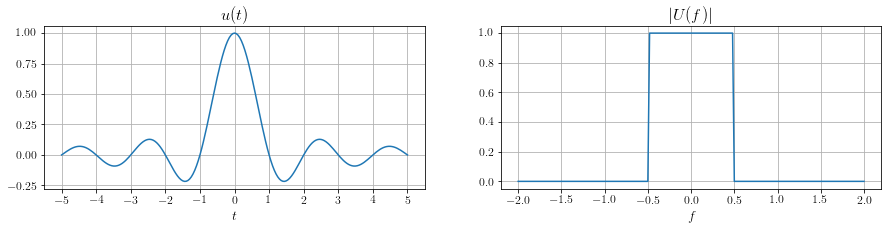

In [4]:
# Sinus cardinal
h = A/d * np.sinc(t/d)
H = np.where(np.abs(f)<1/(2*d), A, 0)
myplot(t, h, f, H, "sinc")

/home/miv/mazet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


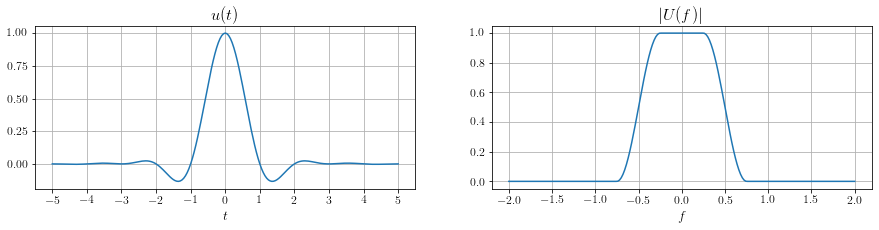

In [5]:
# Cosinus surélevé
# Source : https://en.wikipedia.org/wiki/Raised-cosine_filter

h = np.where(np.abs(t)==d/(2*a),
    pi/(4*d) * np.sinc(1/(2*a)),
    1/d * np.sinc(t/d) * np.cos(pi*a*t/d) / (1-(2*a*t/d)**2)
)

af = np.abs(f)
H0 = .5 * ( 1 + np.cos(pi*d/a*(af-(1-a)/(2*d))) )
H = 1 * (af <= (1-a)/(2*d)) \
  + H0 * ((1-a)/(2*d) < af) * (af <= (1+a)/(2*d)) \
  + 0 * ((1+a)/(2*d))

myplot(t, h, f, H, "rcos")